# Wstęp do uczenia maszynowego - projekt 1
### Census Income EDA

### Wczytanie pakietów

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
from matplotlib import pyplot as plt


### Import danych

In [ ]:
df_incomes = pd.read_csv("census_income_dataset.csv", )
df_attributes = pd.read_csv("attributes_census_income.csv")

In [ ]:
print(df_attributes)

              name     type                                        description
0              age  integer                                  age of individual
1        workclass   string  Values: Private, Self-emp-not-inc, Self-emp-in...
2           fnlwgt    float  Final sampling weight. Inverse of sampling fra...
3        education   string  Values: Bachelors, Some-college, 11th, HS-grad...
4    education_num  integer                                                NaN
5   marital_status   string  Values: Married-civ-spouse, Divorced, Never-ma...
6       occupation   string  Values: Tech-support, Craft-repair, Other-serv...
7     relationship   string  Values: Wife, Own-child, Husband, Not-in-famil...
8             race   string  Values: White, Asian-Pac-Islander, Amer-Indian...
9              sex   string                               Values: Female, Male
10    capital_gain    float                                                NaN
11    capital_loss    float                         

### Wstępne poglądowe informacje o danych

In [ ]:
df_incomes.shape

(48842, 15)

In [ ]:
df_incomes.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
df_incomes.info()
#Nie ma nulli jako takich

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education_num   48842 non-null  int64  
 5   marital_status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital_gain    48842 non-null  float64
 11  capital_loss    48842 non-null  float64
 12  hours_per_week  48842 non-null  float64
 13  native_country  48842 non-null  object 
 14  income_level    48842 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.6+ MB


In [ ]:
df_incomes.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#Bardziej jako ciekawostka, osoby pracujące 99 godzin tygodniowo
df_incomes[df_incomes.hours_per_week >= 99]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
935,37,Private,176900.0,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,99.0,United-States,>50K
1172,25,Private,404616.0,Masters,14,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0.0,0.0,99.0,United-States,>50K
1887,55,Self-emp-not-inc,184425.0,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,99.0,United-States,>50K
3578,37,Self-emp-inc,382802.0,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0.0,0.0,99.0,United-States,>50K
4086,50,?,174964.0,10th,6,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,99.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47050,31,?,170513.0,HS-grad,9,Divorced,?,Not-in-family,White,Female,0.0,0.0,99.0,United-States,<=50K
47107,32,State-gov,246282.0,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,2961.0,0.0,99.0,?,<=50K
47376,49,?,111282.0,7th-8th,4,Married-civ-spouse,?,Husband,White,Male,4386.0,0.0,99.0,United-States,>50K
47760,48,Private,250736.0,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0.0,0.0,99.0,United-States,<=50K


### Wartości brakujące

In [ ]:
#To są faktyczne nulle w zmiennych kategorycznych 
df_incomes[df_incomes == "?"].count()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income_level         0
dtype: int64

In [ ]:
#To powinny być teoretycznie nulle w zmiennych numerycznych, ale, jak widać, nie ma
incomes_numerical = df_incomes.iloc[:,[0,2,4,10,11,12]]
incomes_numerical[incomes_numerical == -100000].count()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

Zamieńmy wartości w pustych polach na faktyczne NULLe

In [ ]:
df_incomes = df_incomes.replace('?',np.nan).replace(-100000, np.nan)

In [ ]:
df_incomes.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income_level         0
dtype: int64

### Wizualizacje - rozkłady

 Dane numeryczne:

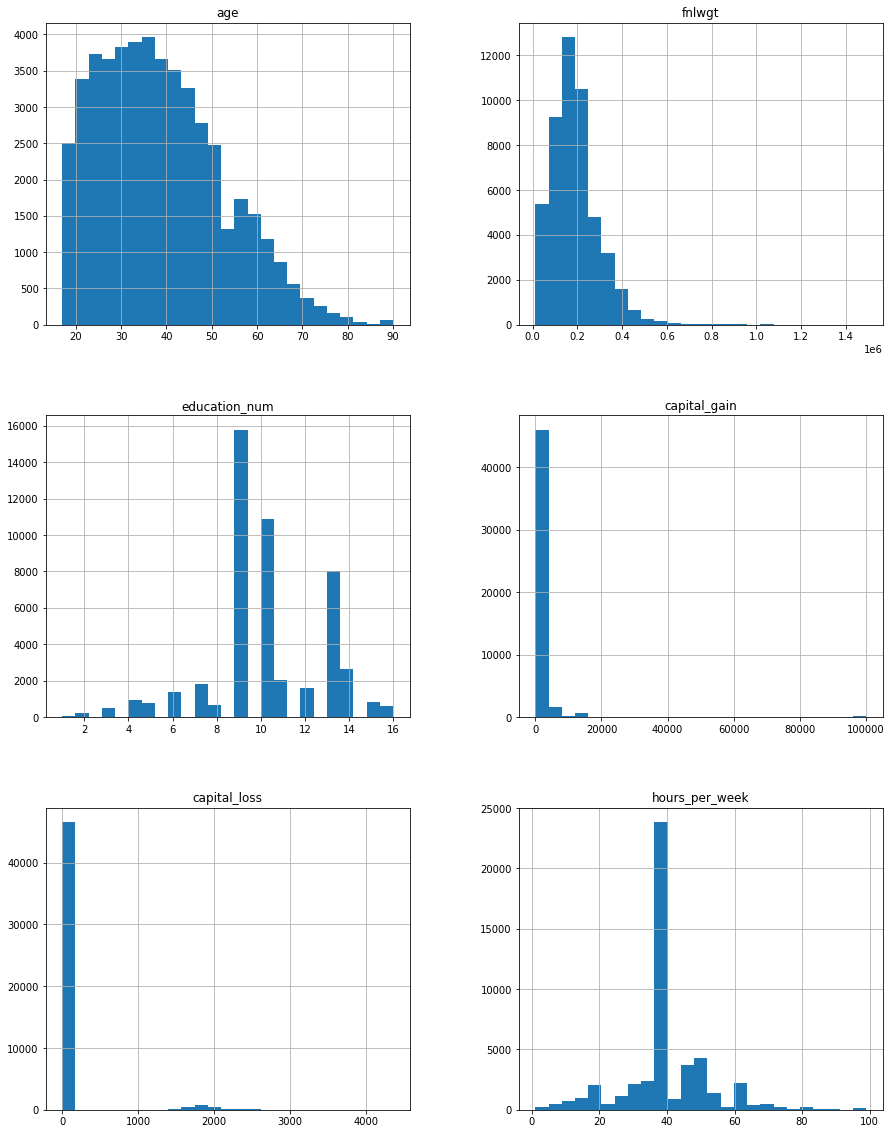

In [ ]:
df_incomes.hist(bins = 25, figsize = (15,20))
plt.show()

Możemy odczytać, że cecha 'age' ma rozkład zbliżony do rozkładu normalnego, jednak jest ucięta w 16 (charakterystyka danych). Poza tym Wartości cech 'capital loss' i 'capital gain' wydają się być mało przydatne ze względu na swoje rozkłady wartości.

Dane kategoryczne:

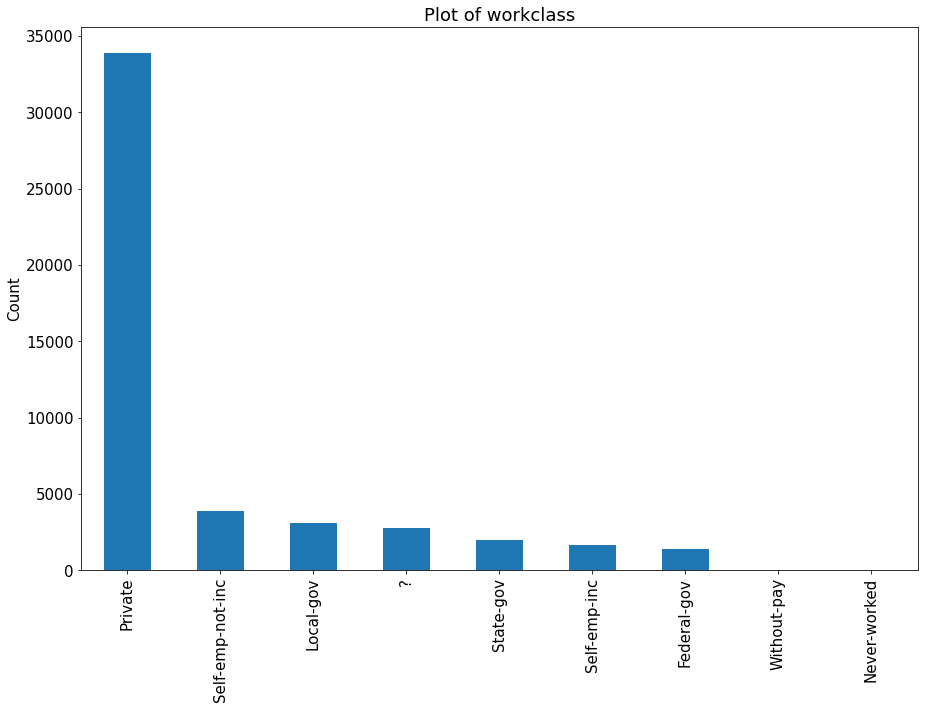

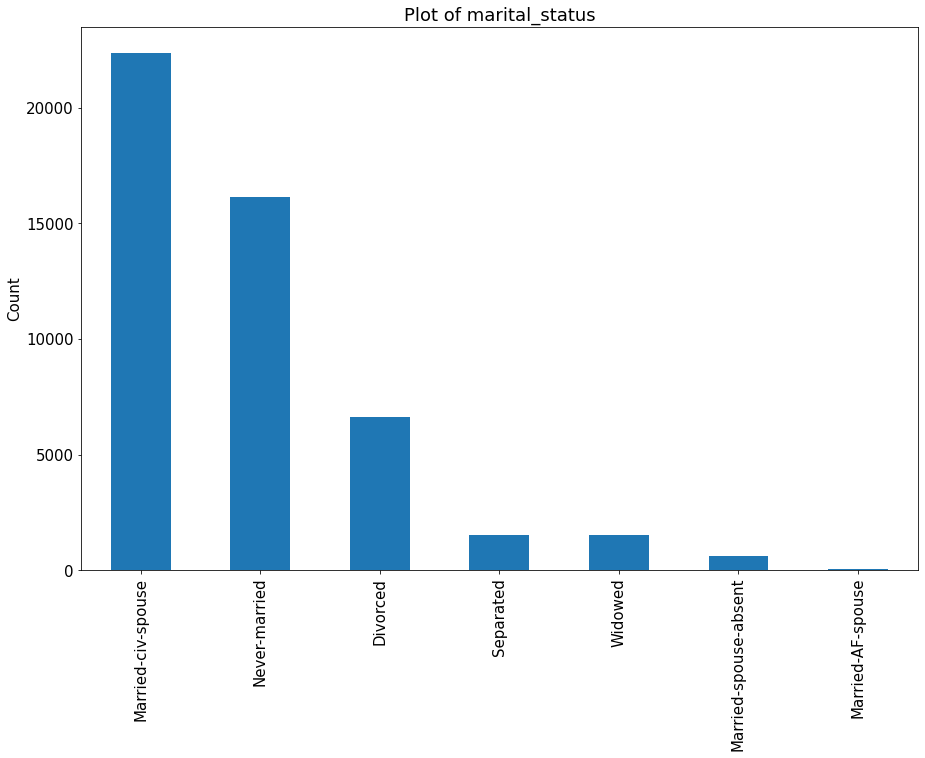

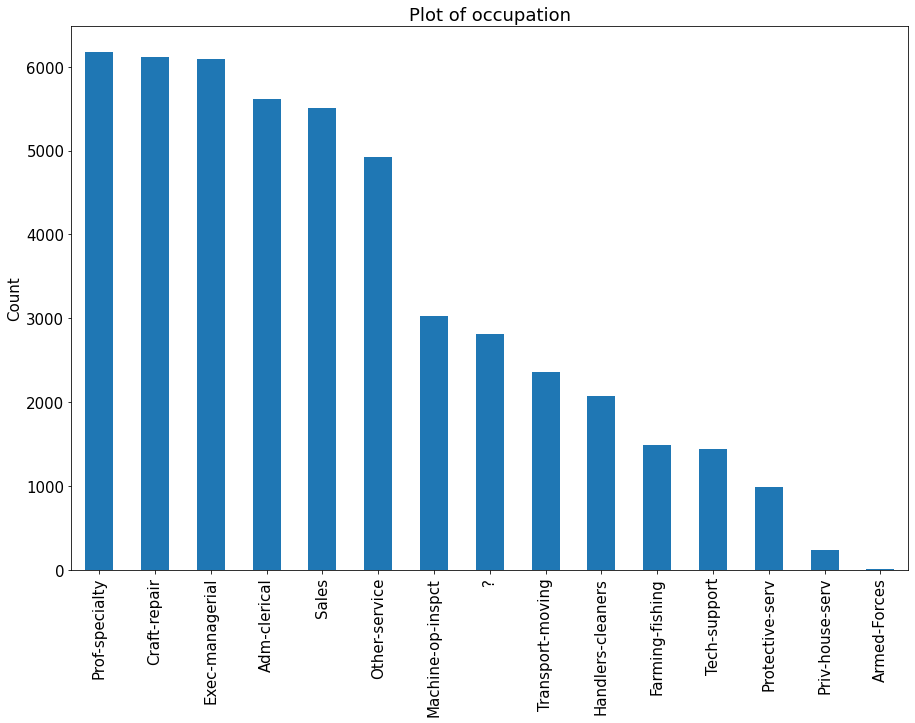

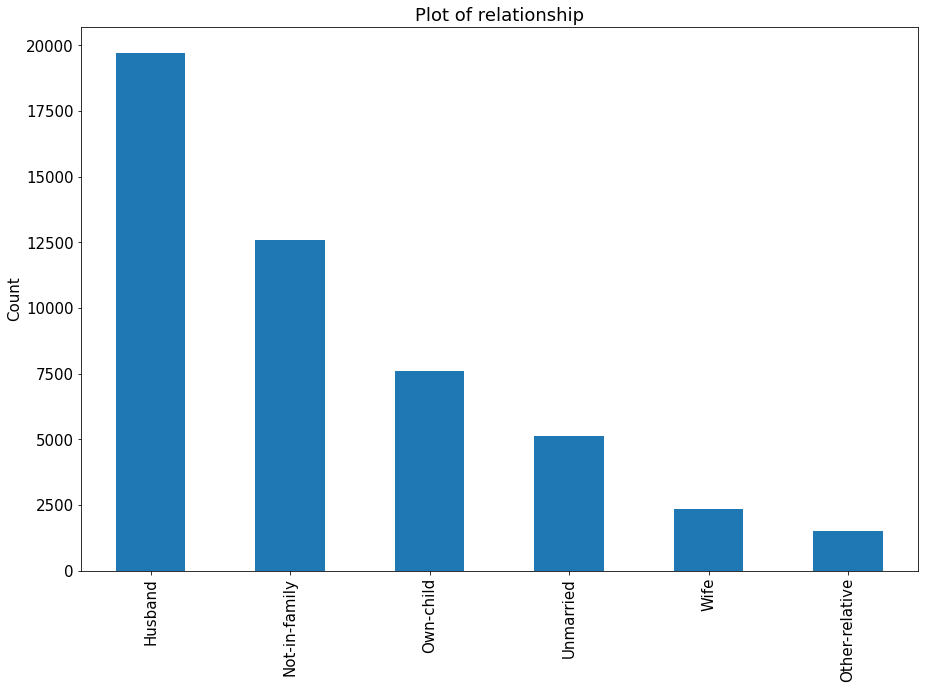

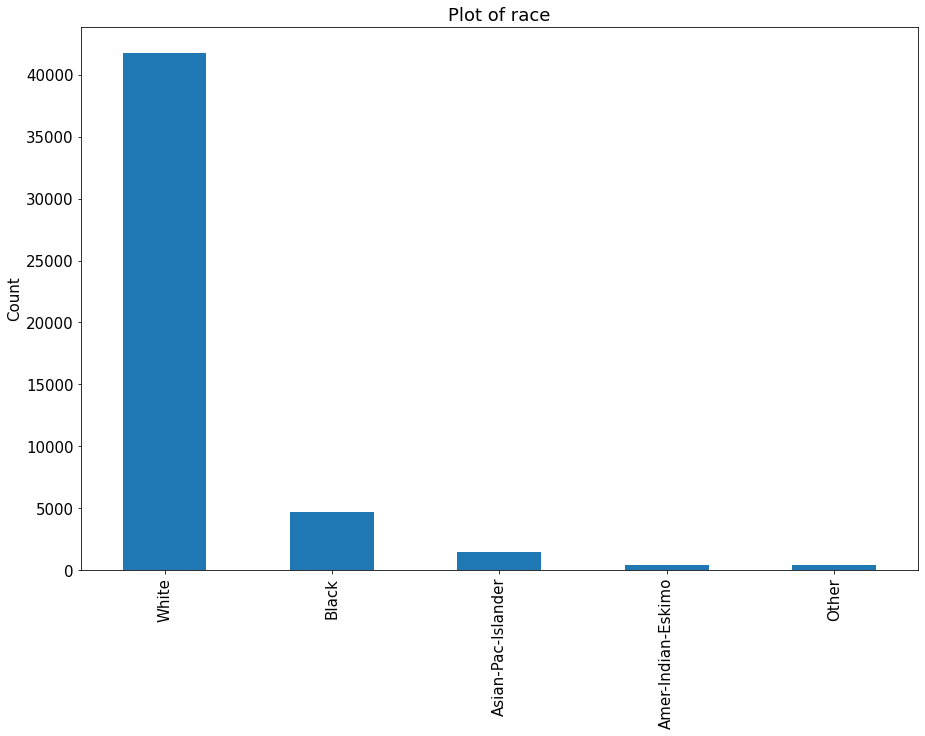

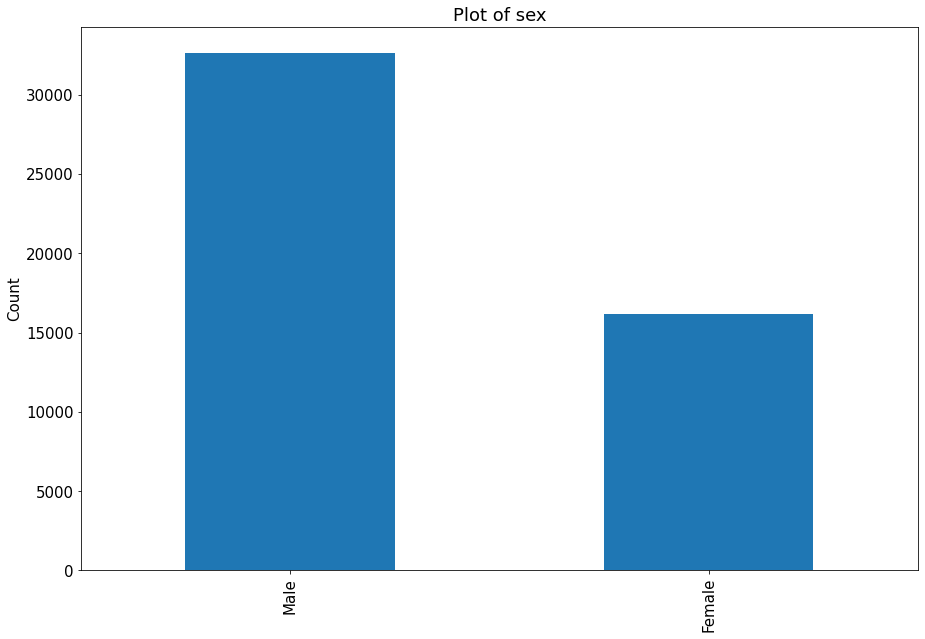

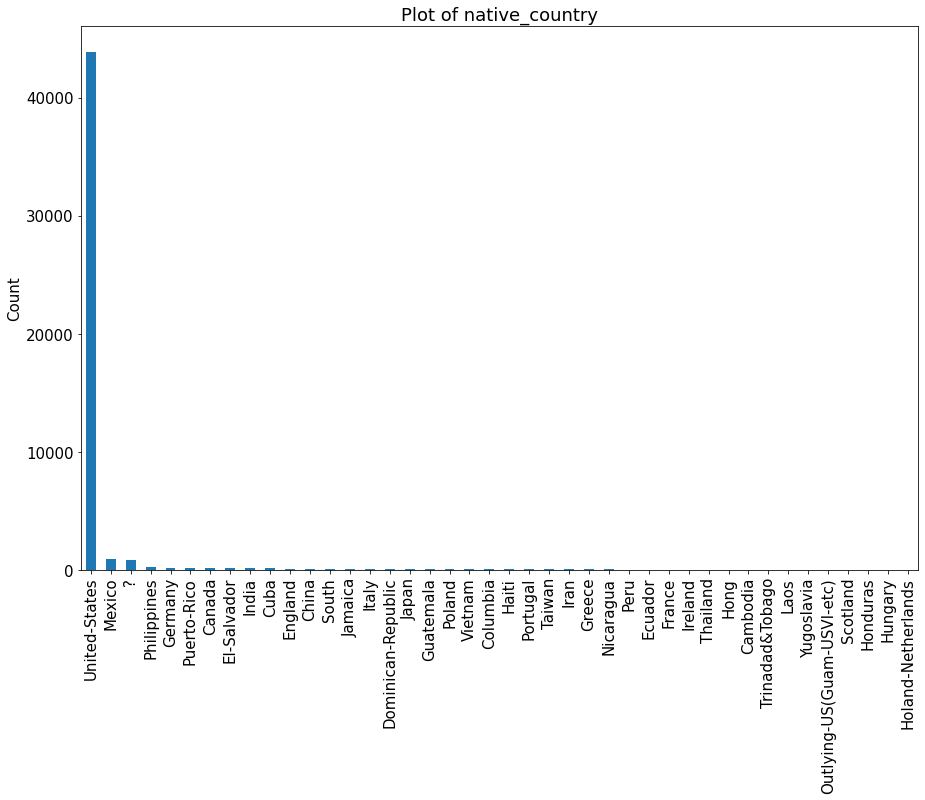

In [ ]:
income_categorical = df_incomes.iloc[:,np.r_[1,5:10,13]]
for column in income_categorical:
  income_categorical[column].value_counts().plot(kind = "bar", figsize = (15,10))
  plt.title("Plot of %s"%column)
  plt.ylabel("Count")
  plt.show()
matplotlib.rcParams.update({'font.size': 15})


Dobrze widać, że poza jednym wyjątkiem (wykonywany zawód), wykresy te są raczej dominowane przez jedną lub kilka wartości (np. w krajach pochodzenia zdecydowanie dominują Stany Zjednoczone- czy jest więc sens korzystać z tej zmiennej?)

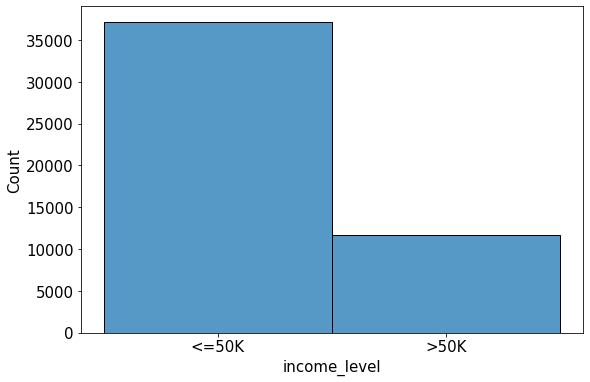

In [ ]:
sns.histplot(df_incomes['income_level'])
matplotlib.rcParams['figure.figsize'] = [9,6]
plt.show()
#Nie ma równej dystrybucji

In [ ]:
df_incomes.shape[0] - df_incomes[df_incomes == 0].count()
#Liczba niezerowych wartości, jak widać capital gain i capital loss to praktycznie same zera, 
#więc pewnie nie będą przydatne

age               48842
workclass         48842
fnlwgt            48842
education         48842
education_num     48842
marital_status    48842
occupation        48842
relationship      48842
race              48842
sex               48842
capital_gain       4035
capital_loss       2282
hours_per_week    48842
native_country    48842
income_level      48842
dtype: int64

Być może niezerowe wartości capital gain lub capital loss mogą jednoznacznie określić, czy osoba zarabia więcej niż 50k (jeśli pojawiają się tylko u osób >50k)? Sprawdźmy to.

In [ ]:
non_zero_capital = df_incomes.loc[(df_incomes['capital_gain'] != 0) | (df_incomes['capital_loss'] != 0)].loc[:, ['capital_gain', 'capital_loss', 'income_level']]

In [ ]:
non_zero_capital.shape

(6317, 3)

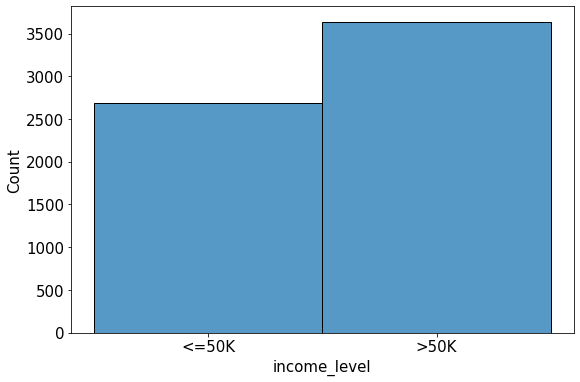

In [ ]:
sns.histplot(non_zero_capital.income_level)
matplotlib.rcParams['figure.figsize'] = [9,6]
plt.show()


Choć tym razem widać przewagę osób >50k, to nie jest ona zbyt znacząca. 
wygląda na to, że zmienne capital_loss i capital_gain nam się nie przydadzą.

### Szczegółowa analiza 

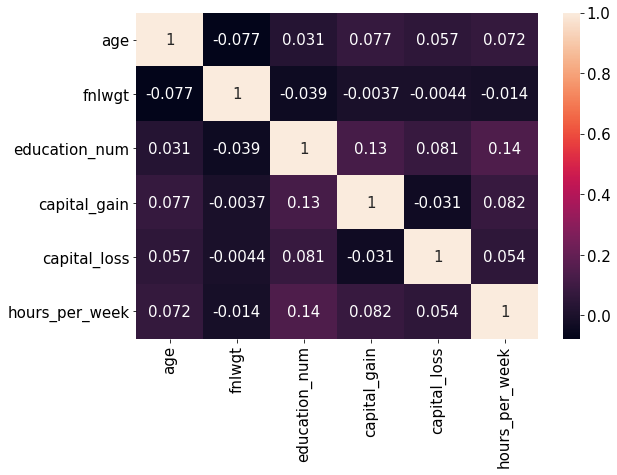

In [ ]:
sns.heatmap(df_incomes.corr(), annot=True)
matplotlib.rcParams['figure.figsize'] = [9,6]
plt.show()

Jak widać, zmienne raczej nie są ze sobą skorelowane.

#### Workclass:

In [ ]:
df_incomes.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Jak widać zdecydowanie przeważa zatrudnienie w sektorze prywatnym.

#### Education:

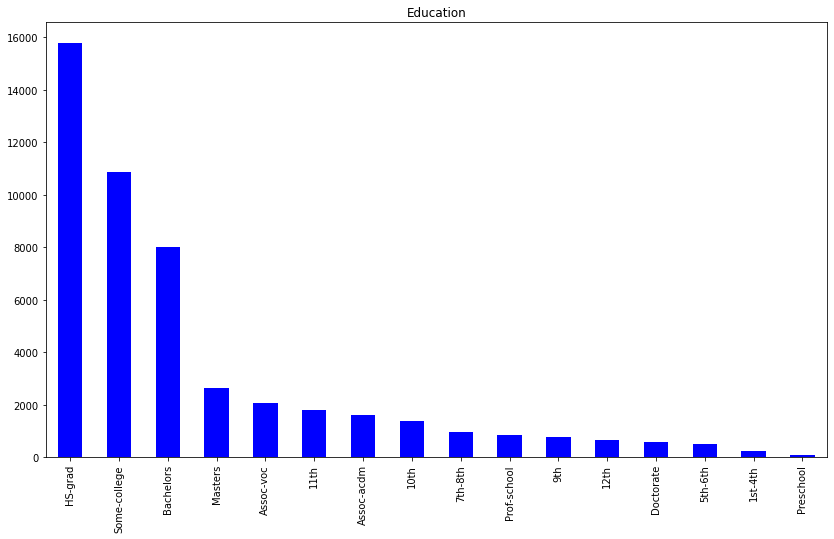

In [ ]:
ax = df_incomes['education'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Education", color='blue')

Wybijają się trzy wartości - ukończenie szkoły średniej, podjęcie studiów oraz wykształcenie wyższe.

#### Education vs income:

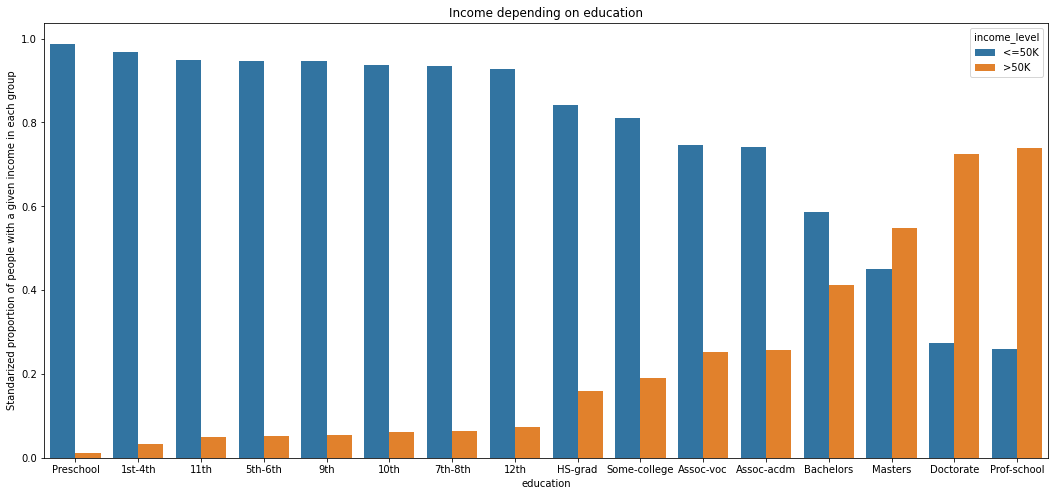

In [ ]:
data = df_incomes.groupby(['income_level', 'education']).agg(['count'])['age']
data_for_plot = data / data.groupby(level=1).sum()
data_for_plot = data_for_plot.reset_index().sort_values(by=['income_level','count'], ascending=[True,False])

fig, ax = plt.subplots()
sns.barplot(data = data_for_plot, x='education', y='count', hue='income_level')
fig.set_size_inches(18,8)
plt.ylabel('Standarized proportion of people with a given income in each group')
plt.title("Income depending on education")
plt.show()

Wyraźnie widać tendencję - im wyższe wykształcenie, tym wyższe zarobki. Od tytułu magistra w górę przewagę mają zarobki >=50k rocznie.

#### Occupation vs income

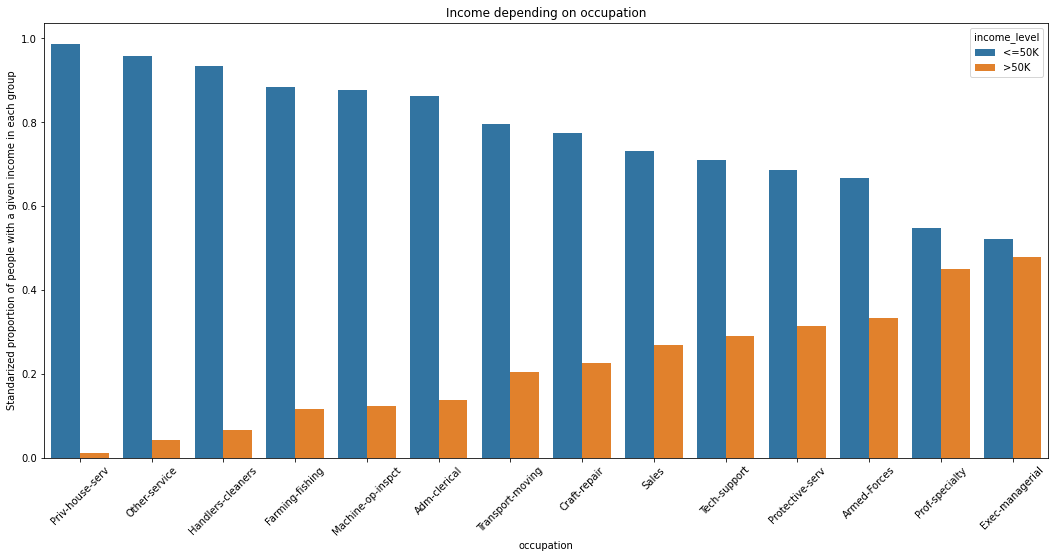

In [ ]:
data = df_incomes.groupby(['income_level', 'occupation']).agg(['count'])['age']
data_for_plot = data / data.groupby(level=1).sum()
data_for_plot = data_for_plot.reset_index().sort_values(by=['income_level','count'], ascending=[True,False])

fig, ax = plt.subplots()
sns.barplot(data = data_for_plot, x='occupation', y='count', hue='income_level')
fig.set_size_inches(18,8)
plt.ylabel('Standarized proportion of people with a given income in each group')
plt.title("Income depending on occupation")
plt.xticks(rotation=45)
plt.show()

Najbardziej zbliżona liczba pracowników zarabiających <50k i >50k rocznie występuje na stanowiskach kierowniczych oraz naukowych.

#### Race vs income

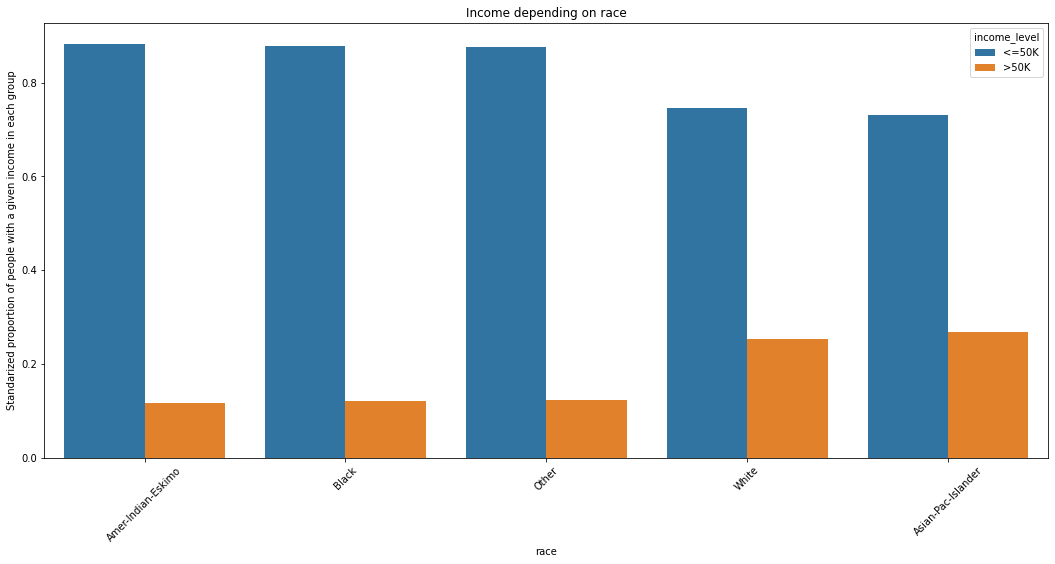

In [ ]:
data = df_incomes.groupby(['income_level', 'race']).agg(['count'])['age']
data_for_plot = data / data.groupby(level=1).sum()
data_for_plot = data_for_plot.reset_index().sort_values(by=['income_level','count'], ascending=[True,False])

fig, ax = plt.subplots()
sns.barplot(data = data_for_plot, x='race', y='count', hue='income_level')
fig.set_size_inches(18,8)
plt.ylabel('Standarized proportion of people with a given income in each group')
plt.title("Income depending on race")
plt.xticks(rotation=45)
plt.show()

#### Sex vs income

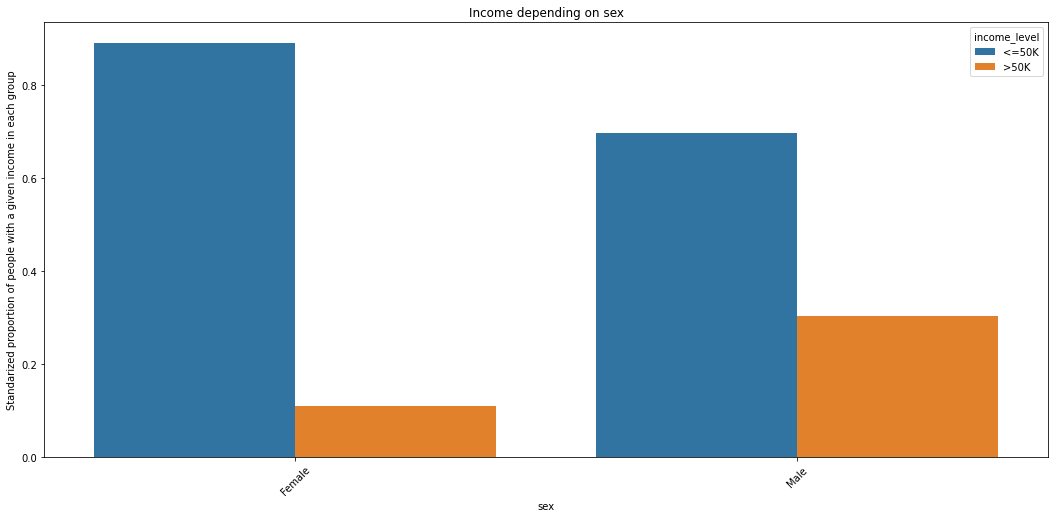

In [ ]:
data = df_incomes.groupby(['income_level', 'sex']).agg(['count'])['age']
data_for_plot = data / data.groupby(level=1).sum()
data_for_plot = data_for_plot.reset_index().sort_values(by=['income_level','count'], ascending=[True,False])

fig, ax = plt.subplots()
sns.barplot(data = data_for_plot, x='sex', y='count', hue='income_level')
fig.set_size_inches(18,8)
plt.ylabel('Standarized proportion of people with a given income in each group')
plt.title("Income depending on sex")
plt.xticks(rotation=45)
plt.show()

#### Marital status vs income

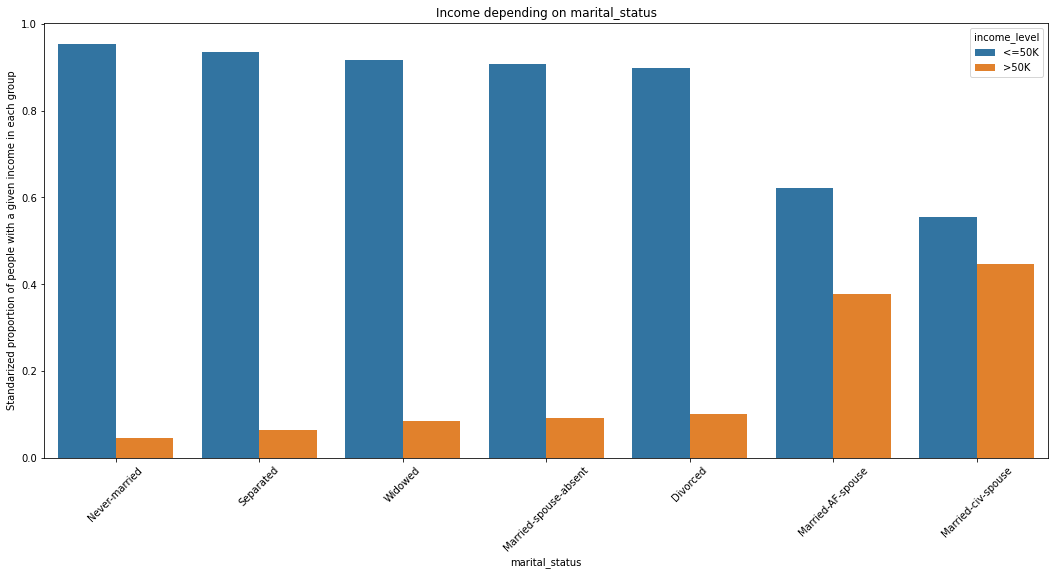

In [ ]:
data = df_incomes.groupby(['income_level', 'marital_status']).agg(['count'])['age']
data_for_plot = data / data.groupby(level=1).sum()
data_for_plot = data_for_plot.reset_index().sort_values(by=['income_level','count'], ascending=[True,False])

fig, ax = plt.subplots()
sns.barplot(data = data_for_plot, x='marital_status', y='count', hue='income_level')
fig.set_size_inches(18,8)
plt.ylabel('Standarized proportion of people with a given income in each group')
plt.title("Income depending on marital_status")
plt.xticks(rotation=45)
plt.show()